In [1]:
# 必要なモジュールのインストール
import pandas as pd
import numpy as np
import datetime
import matplotlib
from matplotlib import pylab as plt
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats


In [2]:
#Pandasを使って失業率のファイルを読み込み
GDP_Diff = pd.read_csv("GDP四半期_前年同期比.csv")
GDP_Diff = GDP_Diff[['時間軸（四半期）', '国内総生産(支出側)']]
GDP_Diff.head(5)

,時間軸（四半期）,国内総生産(支出側)
0,1995年1～3月期,1.0
1,1995年4～6月期,2.2
2,1995年7～9月期,2.4
3,1995年10～12月期,3.1
4,1996年1～3月期,3.0


In [3]:
# 実質賃金の値を読み込み
EfficiveRateAll = pd.read_csv('実質賃金_四半期別前年比.csv')

# 調査月、調査年、値、就業形態のみ残す
EfficiveRateAll = EfficiveRateAll[["調査月","調査年","value"]]

# valueが[-]のものは削除する
EfficiveRateAll = EfficiveRateAll[EfficiveRateAll['value'] != '-']
EfficiveRateAll["時間軸（四半期）"] = EfficiveRateAll["調査年"]+EfficiveRateAll["調査月"]
EfficiveRateAll= EfficiveRateAll[['時間軸（四半期）', 'value']]

EfficiveRateAll.head()

,時間軸（四半期）,value
39,1991年第１四半期,0.1
40,1992年第１四半期,1.9
41,1993年第１四半期,-0.6
42,1994年第１四半期,0.8
43,1995年第１四半期,2.0


In [4]:
# GDPの時間軸列を実質賃金に合わせる
time_label = GDP_Diff['時間軸（四半期）']
fix_time_label = []

for i in time_label:
    if not(i.find('1～3月期')==-1):
        fix_time_label.append(i.replace('1～3月期', '第１四半期'))
    elif not(i.find('4～6月期')==-1):
        fix_time_label.append(i.replace('4～6月期', '第２四半期'))
    elif not(i.find('7～9月期')==-1):
        fix_time_label.append(i.replace('7～9月期', '第３四半期'))
    else:
        fix_time_label.append(i.replace('10～12月期', '第４四半期'))

GDP_Diff['調査月'] = fix_time_label
GDP_Diff = GDP_Diff[['調査月', '国内総生産(支出側)']]

GDP_Diff.head()

,調査月,国内総生産(支出側)
0,1995年第１四半期,1.0
1,1995年第２四半期,2.2
2,1995年第３四半期,2.4
3,1995年第４四半期,3.1
4,1996年第１四半期,3.0


In [5]:
# 二つのデータフレームを結合する
Merge_Deta = pd.merge(GDP_Diff, EfficiveRateAll, left_on='調査月', right_on='時間軸（四半期）')
Merge_Deta.head()


,調査月,国内総生産(支出側),時間軸（四半期）,value
0,1995年第１四半期,1.0,1995年第１四半期,2.0
1,1995年第２四半期,2.2,1995年第２四半期,0.2
2,1995年第３四半期,2.4,1995年第３四半期,2.0
3,1995年第４四半期,3.1,1995年第４四半期,1.5
4,1996年第１四半期,3.0,1996年第１四半期,1.6


In [6]:
# nullを取っている値がないか確認
Merge_Deta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   調査月         83 non-null     object 
 1   国内総生産(支出側)  83 non-null     float64
 2   時間軸（四半期）    83 non-null     object 
 3   value       83 non-null     object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [7]:
# value の値がobjectになっているので修正する
Merge_Deta['実質賃金'] = pd.to_numeric(Merge_Deta['value'], errors='coerce')
Merge_Deta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   調査月         83 non-null     object 
 1   国内総生産(支出側)  83 non-null     float64
 2   時間軸（四半期）    83 non-null     object 
 3   value       83 non-null     object 
 4   実質賃金        83 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


In [8]:
# GDPおよび実質賃金の値の基礎統計量を確認する
Merge_Deta.describe()

,国内総生産(支出側),実質賃金
count,83.000000,83.000000
mean,0.272289,-0.549398
std,2.279084,1.455634
min,-8.600000,-3.700000
25%,-1.000000,-1.600000
50%,0.700000,-0.600000
75%,1.800000,0.450000
max,3.800000,2.800000


In [9]:
# GDPと実質賃金の相関係数を計算
Merge_Deta.corr()

,国内総生産(支出側),実質賃金
国内総生産(支出側),1.000000,0.429783
実質賃金,0.429783,1.000000


In [10]:
# GDPと実質賃金で線形回帰を行う
lr = linear_model.LinearRegression()
X = Merge_Deta[['実質賃金']].values
Y = Merge_Deta['国内総生産(支出側)'].values

lr.fit(X,Y)

LinearRegression()

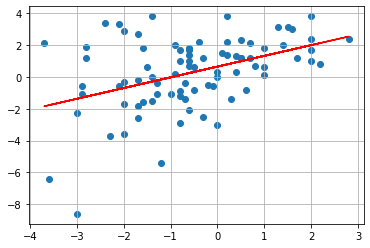

In [11]:
plt.scatter(X,Y)
plt.plot(X, lr.predict(X), color='red')
plt.grid()

plt.show()


In [12]:
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X,Y))


[0.67290986]
0.6419842119569741
0.18471316521258452


In [13]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())
print(est2.summary2().tables[1])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     18.35
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           5.02e-05
Time:                        18:08:54   Log-Likelihood:                -177.17
No. Observations:                  83   AIC:                             358.3
Df Residuals:                      81   BIC:                             363.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6420      0.243      2.641      0.0